Comprehensive Regularization Models:

- Baseline (No Regularization)
L1 Regularization
L2 Regularization
L1 and L2 Regularization
Dropout Regularization
Combined L1, L2, and Dropout Regularization

- Complex Dataset Features:

2000 samples
50 features
Non-linear interactions
Added noise
Class imbalance


- Training Enhancements:

Early stopping
Consistent evaluation metrics
Visualization of test accuracies


- Visualization:

Bar plot comparing test accuracies across different regularization techniques



- What to Look For:

Compare train and test accuracies
Note the accuracy differences (indicator of overfitting)
Observe how different regularization techniques impact model performance
- 
The script will:

Train each model
Print individual model performance
Generate a bar plot comparing test accuracies

Would you like me to explain the expected outcomes or elaborate on any of the regularization techniques?

### The helps provide more insights into how different regularization techniques affect model performance:

Train Accuracy shows how well the model fits the training data
Test Accuracy shows the model's generalization performance
Accuracy Difference indicates potential overfitting or underfitting

The code now prints out more detailed information for each regularization method, allowing for a more comprehensive comparison of their effects on the model's performance.



Training: Baseline (No Regularization)
Baseline (No Regularization):
  Train Accuracy: 0.9688
  Test Accuracy: 0.9400
  Accuracy Difference: 0.0288

Training: L1 Regularization
L1 Regularization:
  Train Accuracy: 0.9775
  Test Accuracy: 0.9450
  Accuracy Difference: 0.0325

Training: L2 Regularization
L2 Regularization:
  Train Accuracy: 0.9675
  Test Accuracy: 0.9500
  Accuracy Difference: 0.0175

Training: Dropout Regularization
Dropout Regularization:
  Train Accuracy: 0.9550
  Test Accuracy: 0.9300
  Accuracy Difference: 0.0250

Training: Combined Regularization
Combined Regularization:
  Train Accuracy: 0.9600
  Test Accuracy: 0.9500
  Accuracy Difference: 0.0100


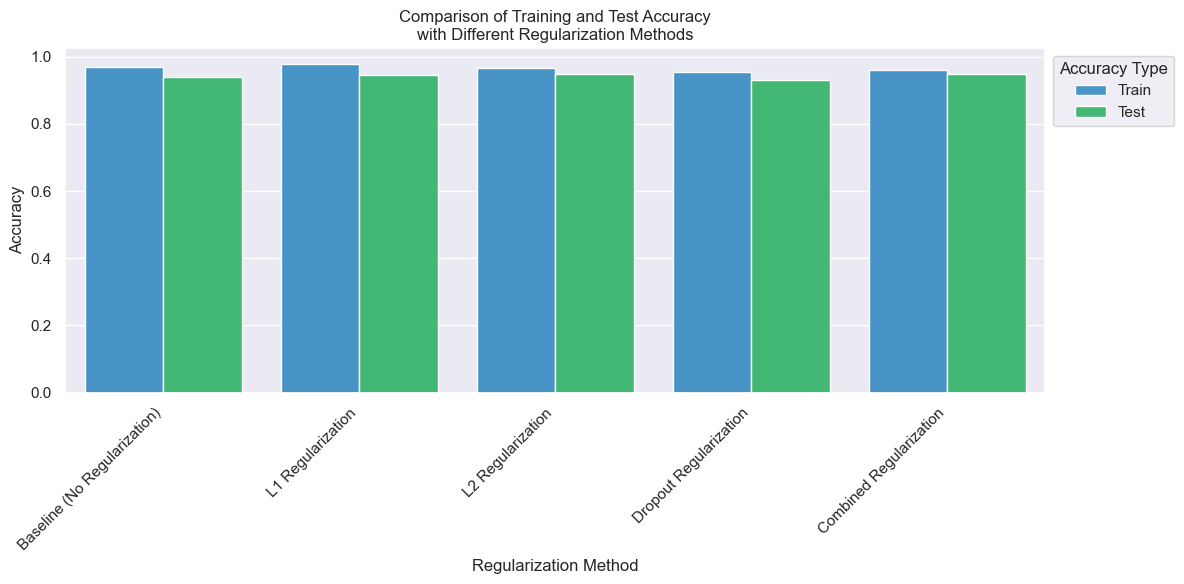

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


def create_dataset():
    """
    Generate a synthetic classification dataset.
    """
    X, y = make_classification(n_samples=1000,
                               n_features=20,
                               n_informative=10,
                               n_redundant=5,
                               random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=42)
    return X_train, X_test, y_train, y_test


def preprocess_data(X_train, X_test):
    """
    Scale the data using StandardScaler.
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled


def create_baseline_model(input_dim):
    """
    Create a baseline model (no regularization).
    """
    model = keras.Sequential([
        keras.Input(shape=(input_dim, )),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model


def create_l1_model(input_dim):
    """
    Create a model with L1 regularization.
    """
    model = keras.Sequential([
        keras.Input(shape=(input_dim, )),
        layers.Dense(128,
                     activation='relu',
                     kernel_regularizer=regularizers.l1(0.001)),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model


def create_l2_model(input_dim):
    """
    Create a model with L2 regularization.
    """
    model = keras.Sequential([
        keras.Input(shape=(input_dim, )),
        layers.Dense(128,
                     activation='relu',
                     kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model


def create_dropout_model(input_dim):
    """
    Create a model with Dropout regularization.
    """
    model = keras.Sequential([
        keras.Input(shape=(input_dim, )),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model


def create_combined_model(input_dim):
    """
    Create a model with L1, L2 and Dropout regularization.
    """
    model = keras.Sequential([
        keras.Input(shape=(input_dim, )),
        layers.Dense(128,
                     activation='relu',
                     kernel_regularizer=regularizers.l1_l2(l1=0.001,
                                                          l2=0.001)),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model


def plot_model_metrics(results):
    """
    Create a grouped bar chart comparing train and test accuracies 
    using Seaborn with improved layout.
    """

    # Prepare data for Seaborn
    data = []
    for model_name, metrics in results.items():
        data.append({
            'Model': model_name,
            'Accuracy': metrics['Train Accuracy'],
            'Type': 'Train'
        })
        data.append({
            'Model': model_name,
            'Accuracy': metrics['Test Accuracy'],
            'Type': 'Test'
        })

    df = pd.DataFrame(data)

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='Model',
                     y='Accuracy',
                     hue='Type',
                     data=df,
                     palette={'Train': '#3498db', 'Test': '#2ecc71'})
    plt.title(
        'Comparison of Training and Test Accuracy\nwith Different Regularization Methods'
    )
    plt.ylabel('Accuracy')
    plt.xlabel('Regularization Method')
    plt.xticks(rotation=45, ha='right')

    # Adjust legend position to prevent overlap
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles,
              labels=labels,
              title='Accuracy Type',
              loc='upper left',
              bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.show()


def main():
    # Load and preprocess data
    X_train, X_test, y_train, y_test = create_dataset()
    X_train_scaled, X_test_scaled = preprocess_data(X_train, X_test)

    # Model training and evaluation parameters
    epochs = 100
    batch_size = 32

    # Early stopping to prevent overfitting
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=10,
                                                  restore_best_weights=True)

    # Initialize and train models
    models = {
        'Baseline (No Regularization)': create_baseline_model(X_train.shape[1]),
        'L1 Regularization': create_l1_model(X_train.shape[1]),
        'L2 Regularization': create_l2_model(X_train.shape[1]),
        'Dropout Regularization': create_dropout_model(X_train.shape[1]),
        'Combined Regularization': create_combined_model(X_train.shape[1])
    }

    # Train and evaluate each model
    results = {}
    for name, model in models.items():
        print(f"\nTraining: {name}")
        history = model.fit(X_train_scaled,
                            y_train,
                            validation_split=0.2,
                            epochs=epochs,
                            batch_size=batch_size,
                            callbacks=[early_stopping],
                            verbose=0)

        # Evaluate on train and test sets
        train_loss, train_accuracy = model.evaluate(X_train_scaled,
                                                    y_train,
                                                    verbose=0)
        test_loss, test_accuracy = model.evaluate(X_test_scaled,
                                                   y_test,
                                                   verbose=0)

        # Calculate accuracy difference
        accuracy_diff = abs(train_accuracy - test_accuracy)

        results[name] = {
            'Train Loss': train_loss,
            'Train Accuracy': train_accuracy,
            'Test Loss': test_loss,
            'Test Accuracy': test_accuracy,
            'Accuracy Difference': accuracy_diff,
            'Training History': history.history
        }

        print(f"{name}:")
        print(f"  Train Accuracy: {train_accuracy:.4f}")
        print(f"  Test Accuracy: {test_accuracy:.4f}")
        print(f"  Accuracy Difference: {accuracy_diff:.4f}")

    # Create visualization
    plot_model_metrics(results)

    return results


# Run the main function
if __name__ == '__main__':
    results = main()


Training: Baseline (No Regularization)
Baseline (No Regularization):
  Train Accuracy: 0.9688
  Test Accuracy: 0.9450
  Accuracy Difference: 0.0238

Training: L1 Regularization
L1 Regularization:
  Train Accuracy: 0.9750
  Test Accuracy: 0.9400
  Accuracy Difference: 0.0350

Training: L2 Regularization
L2 Regularization:
  Train Accuracy: 0.9712
  Test Accuracy: 0.9500
  Accuracy Difference: 0.0213

Training: Dropout Regularization
Dropout Regularization:
  Train Accuracy: 0.9663
  Test Accuracy: 0.9450
  Accuracy Difference: 0.0213

Training: Combined Regularization
Combined Regularization:
  Train Accuracy: 0.9600
  Test Accuracy: 0.9500
  Accuracy Difference: 0.0100


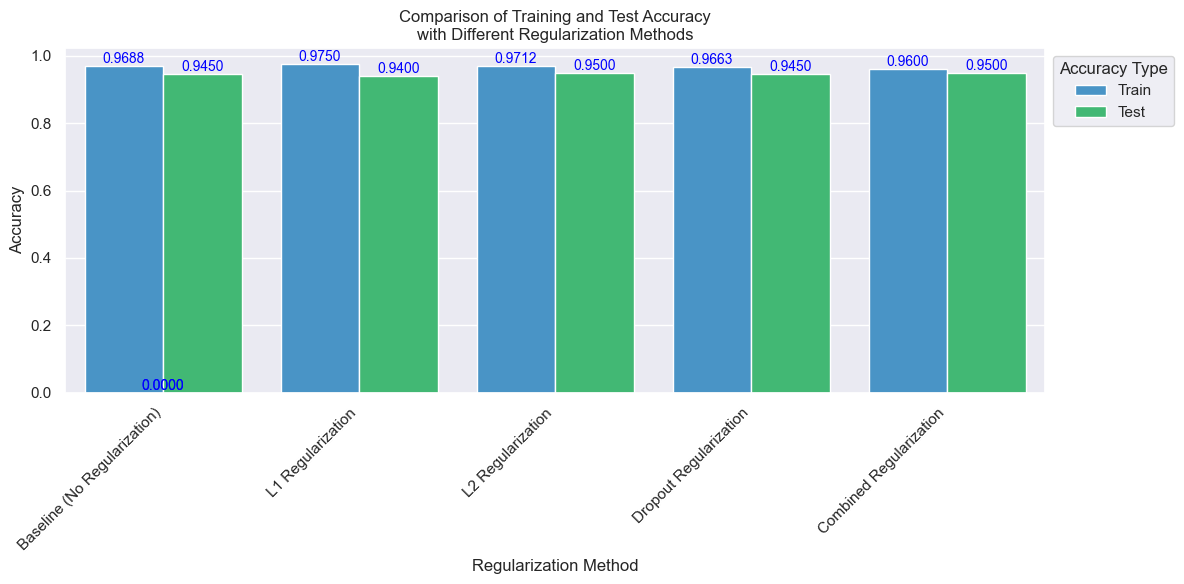

In [18]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


def create_dataset():
    """
    Generate a synthetic classification dataset.
    """
    X, y = make_classification(n_samples=1000,
                               n_features=20,
                               n_informative=10,
                               n_redundant=5,
                               random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=42)
    return X_train, X_test, y_train, y_test


def preprocess_data(X_train, X_test):
    """
    Scale the data using StandardScaler.
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled


def create_baseline_model(input_dim):
    """
    Create a baseline model (no regularization).
    """
    model = keras.Sequential([
        keras.Input(shape=(input_dim, )),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model


def create_l1_model(input_dim):
    """
    Create a model with L1 regularization.
    """
    model = keras.Sequential([
        keras.Input(shape=(input_dim, )),
        layers.Dense(128,
                     activation='relu',
                     kernel_regularizer=regularizers.l1(0.001)),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model


def create_l2_model(input_dim):
    """
    Create a model with L2 regularization.
    """
    model = keras.Sequential([
        keras.Input(shape=(input_dim, )),
        layers.Dense(128,
                     activation='relu',
                     kernel_regularizer=regularizers.l2(0.001)),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model


def create_dropout_model(input_dim):
    """
    Create a model with Dropout regularization.
    """
    model = keras.Sequential([
        keras.Input(shape=(input_dim, )),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model


def create_combined_model(input_dim):
    """
    Create a model with L1, L2 and Dropout regularization.
    """
    model = keras.Sequential([
        keras.Input(shape=(input_dim, )),
        layers.Dense(128,
                     activation='relu',
                     kernel_regularizer=regularizers.l1_l2(l1=0.001,
                                                          l2=0.001)),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model


def plot_model_metrics(results):
    """
    Create a grouped bar chart comparing train and test accuracies 
    using Seaborn with improved layout and accuracy scores displayed.
    """

    # Prepare data for Seaborn
    data = []
    for model_name, metrics in results.items():
        data.append({
            'Model': model_name,
            'Accuracy': metrics['Train Accuracy'],
            'Type': 'Train'
        })
        data.append({
            'Model': model_name,
            'Accuracy': metrics['Test Accuracy'],
            'Type': 'Test'
        })

    df = pd.DataFrame(data)

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='Model',
                     y='Accuracy',
                     hue='Type',
                     data=df,
                     palette={'Train': '#3498db', 'Test': '#2ecc71'})
    plt.title(
        'Comparison of Training and Test Accuracy\nwith Different Regularization Methods'
    )
    plt.ylabel('Accuracy')
    plt.xlabel('Regularization Method')
    plt.xticks(rotation=45, ha='right')

    # Adjust legend position to prevent overlap
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles,
              labels=labels,
              title='Accuracy Type',
              loc='upper left',
              bbox_to_anchor=(1, 1))

    # Add accuracy scores on the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.4f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center',
                    va='center',
                    fontsize=10,
                    color='blue',
                    xytext=(0, 5),
                    textcoords='offset points')

    plt.tight_layout()
    plt.show()


def main():
    # Load and preprocess data
    X_train, X_test, y_train, y_test = create_dataset()
    X_train_scaled, X_test_scaled = preprocess_data(X_train, X_test)

    # Model training and evaluation parameters
    epochs = 100
    batch_size = 32

    # Early stopping to prevent overfitting
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=10,
                                                  restore_best_weights=True)

    # Initialize and train models
    models = {
        'Baseline (No Regularization)': create_baseline_model(X_train.shape[1]),
        'L1 Regularization': create_l1_model(X_train.shape[1]),
        'L2 Regularization': create_l2_model(X_train.shape[1]),
        'Dropout Regularization': create_dropout_model(X_train.shape[1]),
        'Combined Regularization': create_combined_model(X_train.shape[1])
    }

    # Train and evaluate each model
    results = {}
    for name, model in models.items():
        print(f"\nTraining: {name}")
        history = model.fit(X_train_scaled,
                            y_train,
                            validation_split=0.2,
                            epochs=epochs,
                            batch_size=batch_size,
                            callbacks=[early_stopping],
                            verbose=0)

        # Evaluate on train and test sets
        train_loss, train_accuracy = model.evaluate(X_train_scaled,
                                                    y_train,
                                                    verbose=0)
        test_loss, test_accuracy = model.evaluate(X_test_scaled,
                                                   y_test,
                                                   verbose=0)

        # Calculate accuracy difference
        accuracy_diff = abs(train_accuracy - test_accuracy)

        results[name] = {
            'Train Loss': train_loss,
            'Train Accuracy': train_accuracy,
            'Test Loss': test_loss,
            'Test Accuracy': test_accuracy,
            'Accuracy Difference': accuracy_diff,
            'Training History': history.history
        }

        print(f"{name}:")
        print(f"  Train Accuracy: {train_accuracy:.4f}")
        print(f"  Test Accuracy: {test_accuracy:.4f}")
        print(f"  Accuracy Difference: {accuracy_diff:.4f}")

    # Create visualization
    plot_model_metrics(results)

    return results


# Run the main function
if __name__ == '__main__':
    results = main()